In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from statsmodels.stats.outliers_influence import OLSInfluence

# 1. Combined Cycle Power Plant Data Set

The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

## (a) Download the Combined Cycle Power Plant data 
from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

## (b) Exploring the data

### i.

How many rows are in this data set? How many columns? What do the rows and columns represent?

In [2]:
# Read Sheet 1 into dataframe
ccpp = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx', sheet_name=0)
display(ccpp)
print(ccpp.shape)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


(9568, 5)


We see that there are 9568 rows and 5 columns in the data set. The rows represent hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP), which is shown as "PE" in the dataframe, of the plant. The columns represent the abbreviation of features listed above.

### ii. 

Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

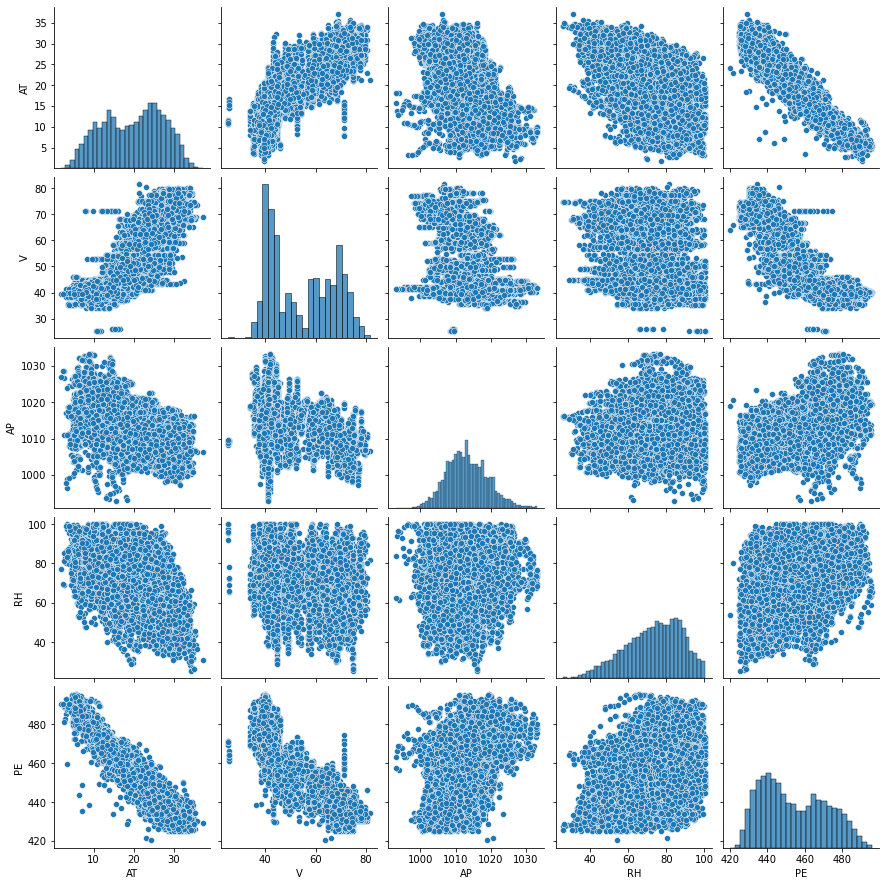

In [3]:
# Make pairwise scattplots
sns.pairplot(data=ccpp)

plt.show()

The pairwise scatterplots of independent variables and dependent varaibels are shown above. Given that PE is the independent variable, we see that Temperature (T) and Exhaust Vacuum (V) may have some negative relationship with PE. However, the relationship between PE and Ambient Pressure (AP) or Relative Humidity (RH) is not clear at this moment.

### iii. 

What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [4]:
# Summarize statistics
ccpp.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
# Initialize a dictionary to store model and test MSE for part (j)
summarize_test_error = dict()

## (c)

For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [6]:
# Define a function to fit simple linear regression
# Display model summary and plot 
def simple_linear_regression(x, y):
    # Format input y_train and x_train
    y_train = ccpp[[y]]
    x_train = ccpp[[x]]
    x_train_sm = sm.add_constant(x_train)
    
    # Fit OLS model
    mod = sm.OLS(y_train, x_train_sm)
    res = mod.fit()
    
    # Display model summary
    print(res.summary())
    
    # Make prediction
    y_pred = res.predict(x_train_sm)
    
    # Make plots
    plt.figure(figsize=(8, 6))
    plt.scatter(x_train, y_train, s=5, color='black')
    plt.plot(x_train, y_pred, color='blue', linewidth=3)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("Simple Linear Regression for {} and {}".format(x, y))

    plt.show()
    
    # Investigate Cook's distance
    cook_distance = OLSInfluence(res).cooks_distance
    
    # Plot Cook's distance
    plt.figure(figsize=(8, 6))
    plt.scatter(x_train, cook_distance[0])
    plt.xlabel(x)
    plt.ylabel('Cooks Distance')
    plt.title("Cook's Distance Outlier Detection for {}".format(x))
    
    plt.show()
    
    # Get estimated coefficient for later use
    return res.params[-1]


In [7]:
# Store estimated coefficient for simple linear regression
simple_lr_params = list()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:13:57   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

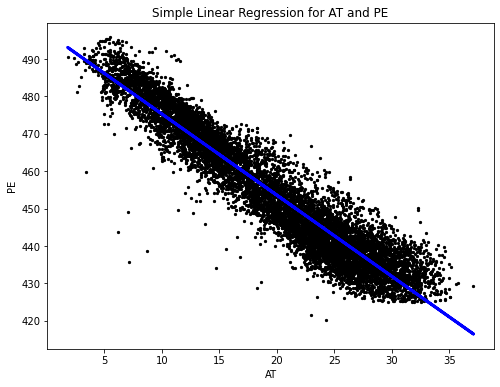

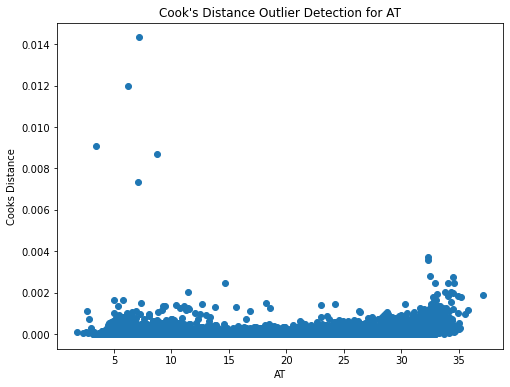

In [8]:
# Fit simple linear regression between Temperature and energy output
simple_lr_params.append(simple_linear_regression("AT", "PE"))

### Temperature: observations

In the summary above, we see that is a statistically significant association between the predictor AT and response PE given that the p-value of the estimated coefficient of AT is $0 < \alpha = 0.05$. 

Speaking of the outliers, we see that there are some points on the upper left corner on the Cook's distance plot that might be outliers given that those points are far from the majority data points.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:13:57   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

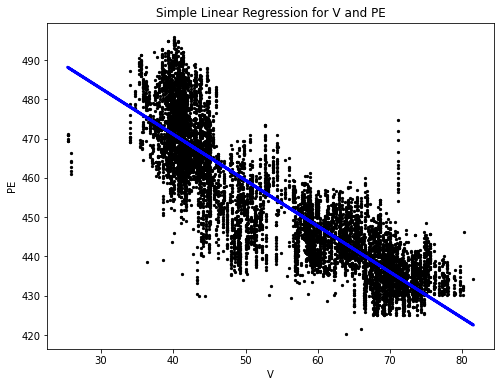

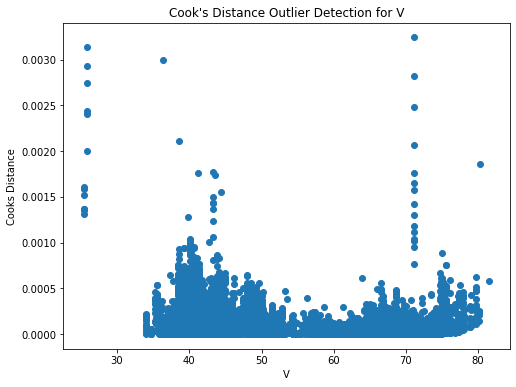

In [9]:
# Fit simple linear regression between Exhaust Vacuum and energy output
simple_lr_params.append(simple_linear_regression('V', 'PE'))

### Exhaust Vaccum: observations

In the summary above, we see that is a statistically significant association between the predictor Exhaust Vaccum (V) and response PE given that the estiamted coefficient for V has a p-value of $0 < \alpha = 0.05$.

Speaking of the outliers, we see that there are some points on the left hand side on the Cook's distance plot as well as some point around the value 70 to be potential outliers.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:13:57   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

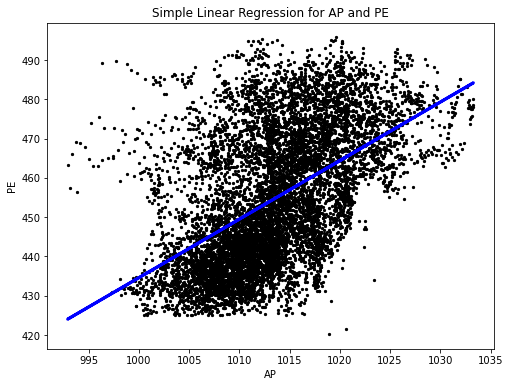

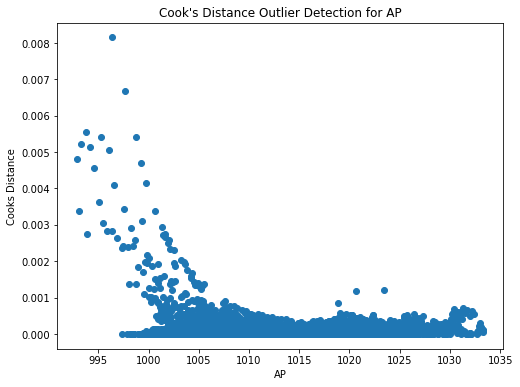

In [10]:
# Fit simple linear regression between Ambient Pressure and energy output
simple_lr_params.append(simple_linear_regression('AP', 'PE'))

### Ambient Pressure: observations

In the summary and plot above, we can see some positive relationship between the predictor Ambient Pressure (AP) and the response PE. The estimated coefficient for AP has a p-value of $0 < \alpha = 0.05$, which indicates statistically significant.

As of outlier, we take a look at the left hand side of the Cook's distance plot, which indicates the potential outliers.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:13:57   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

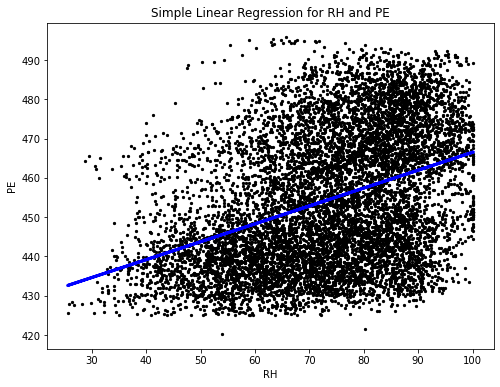

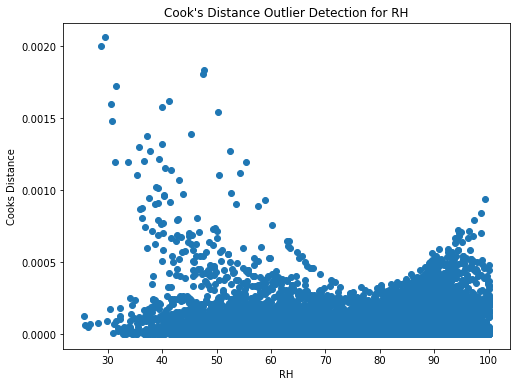

In [11]:
# Fit simple linear regression between Relative Humidity and energy output
simple_lr_params.append(simple_linear_regression('RH', 'PE'))

### Relative Humidity: observations

In the summary above, we see that the estimated coefficient of RH has p-value of $0 < \alpha = 0.05$, which shows statistically significant.

One the left handside and right hand side of the Cook's distance plot, we see data points distributed a way from the majority, indicating outliers of observations.

## (d)

Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0: \beta_j = 0$?

In [12]:
# Format training data
x_train = ccpp[['AT', 'V', 'AP', 'RH']]
x_train_sm = sm.add_constant(x_train)
y_train = ccpp[['PE']]

# Fit multiple regression model
multi_mod = sm.OLS(y_train, x_train_sm)
multi_res = multi_mod.fit()

# Display model summary
print(multi_res.summary())

# Obtain parameters for later use
multi_params = multi_res.params[1:]

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:13:57   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

### Multiple regression model observations

From the summary of the model, we can see that for all predictors (AT, V, AP, and RH), we can reject the null hypothesis $H_0: \beta_j = 0$ given their p-value is essentially zero, which is less than $\alpha = 0.05$. We see statistically significant of multiple regression coefficients.

## (e)

How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

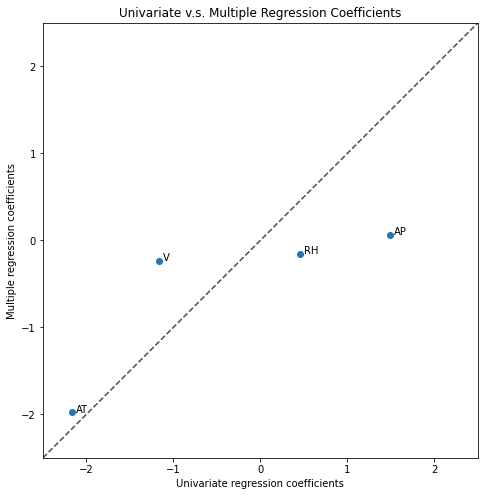

In [13]:
# Add annotation
n = ["AT", "V", "AP", "RH"]

# Plot univariate regression coefficient on x-axis
# Plot multiple regression coefficients on y-axis
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(simple_lr_params, multi_params)

plt.xlabel("Univariate regression coefficients")
plt.ylabel("Multiple regression coefficients")
plt.title("Univariate v.s. Multiple Regression Coefficients")

# Add annotation
for i, txt in enumerate(n):
    ax.annotate(txt, (simple_lr_params[i]+0.05, multi_params[i]))

# Fix axis length
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.gca().set_aspect('equal', adjustable='box')

# Draw a diagnal line to assist us
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

plt.show()

### Observations

The result is display above. We can see that for the variable Temperature (AT), the univariate regression coefficients is similar to the multiple regression coefficients, though it is estimated having large impact in the multiple regression case. 

For Exhaust Vacuum (V), we see that its coefficient has higher estimated value in multiple regression than in univariate regression.

For the variable Ambient Pressure (AP), we see a large difference between the estimated coefficient value in univariate regression and multiple regression. The value of the estimated coefficient in univariate regression is around 1.4, while the value of the estimated coefficient in multiple variable regression is around 0.

The case of variables Relative Humidity (RH) is interesting. In univariate regressions, we see the coefficient of RH is greater than 0. However, in the case of multiple regression, the coefficient goes less than 0.

## (f)

Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the [form](https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features)
$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon 
$$

In [14]:
# Define a function to tranform polynomial features and fit regression model
def poly_feature_regression(x, y):
    # Format input y_train and x_train
    y_train = ccpp[[y]]
    x_train = ccpp[[x]]
    # Include polynomial feature for x_train with degree of 3
    poly = PolynomialFeatures(3)
    x_train_sm = poly.fit_transform(x_train)
    
    # Fit OLS model
    mod = sm.OLS(y_train, x_train_sm)
    res = mod.fit()
    
    # Display model summary
    print(res.summary())

In [15]:
# Fit model for Temperature and energy output
poly_feature_regression('AT', 'PE')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:13:58   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

The summary of predictor Temperature (AT) along with polynomial terms is shown above.

Let's say our null and alternative hypothesis is 
$$
H_0: \beta_3 = 0 \\
H_A: \beta_3 \neq 0
$$

From the summary, we see the p-value for the coefficient of the cubic term is essentially 0, which is less than $\alpha = 0.05$. We reject the null and conclude evidence for the alternative hypothesis that $\beta_3$ is not zero. This indicates that the estimator for the cubic term is statistically significant. There is evidence of nonlinear association given the predictor Temperature.

In [16]:
# Fit model for Exhaust Vacuum and energy output
poly_feature_regression('V', 'PE')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:13:58   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

The summary of predictor Exhaust Vacuum (V) along with polynomial terms is shown above.

Our null and alternative hypothesis is 
$$
H_0: \beta_3 = 0 \\
H_A: \beta_3 \neq 0
$$

From the summary, we see the p-value for the coefficient of the cubic term is $0.014 < \alpha = 0.05$. At this point, we reject the null and conclude evidence for the alternative hypothesis that $\beta_3$ is not zero. This indicates that the estimator for the cubic term is statistically significant. There is evidence of nonlinear association given the predictor Exhaust Vacuum.

In [17]:
# Fit model for Ambient Pressure and energy output
poly_feature_regression('AP', 'PE')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:13:58   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

The summary of predictor Ambient Pressure (AP) along with polynomial terms is shown above.

Our null and alternative hypothesis is 
$$
H_0: \beta_3 = 0 \\
H_A: \beta_3 \neq 0
$$

From the summary, we see the p-value for the coefficient of the cubic term is essentially $0 < \alpha = 0.05$. At this point, we reject the null and conclude evidence for the alternative hypothesis that $\beta_3$ is not zero. This indicates that the estimator for the cubic term is statistically significant. There is evidence of nonlinear association given the predictor Ambient Pressure.

In [18]:
# Fit model for Relative Humidity and energy output
poly_feature_regression('RH', 'PE')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:13:58   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

The summary of predictor Relative Humidity (RH) along with polynomial terms is shown above.

Our null and alternative hypothesis is 
$$
H_0: \beta_3 = 0 \\
H_A: \beta_3 \neq 0
$$

From the summary, we see the p-value for the coefficient of the cubic term is essentially $0 < \alpha = 0.05$. At this point, we reject the null and conclude evidence for the alternative hypothesis that $\beta_3$ is not zero. This indicates that the estimator for the cubic term is statistically significant. There is evidence of nonlinear association given the predictor Relative Humidity.

## (g)

Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [19]:
# Preprocess the data
x_train = ccpp[["AT", "V", "AP", "RH"]]
poly = PolynomialFeatures(interaction_only=True)
x_interactions = poly.fit_transform(x_train)

# Fit full linear regression model
mod = sm.OLS(y_train, x_interactions)
res = mod.fit()
    
# Display model summary
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:13:58   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

In [20]:
# Check how features are combined
display(poly.get_feature_names())

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1 x2',
 'x1 x3',
 'x2 x3']

As the summary and detail of features listed above, we can look at the p-value of some coefficients. 

Let's focusing on the interaction terms and their coefficients. 

We see that for the interaction term $x_5 = x_0 x_2 = AT \cdot AP$, interaction term $x_7 = x_1 x_2 = V \cdot AP$, interaction term $x_8 = x_1 x_3 = V \cdot RH$, and interaction term $x_{10} = x_2 x_3 = AP \cdot RH$, their corresponding p-value is less than $\alpha = 0.05$. This indicates that these interaction terms are statistically significant.

## (h)

Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [21]:
# Split training and testing data
train_set, test_set = train_test_split(ccpp, train_size=0.7)
X_train = train_set[["AT", "V", "AP", "RH"]]
Y_train = train_set[["PE"]]
X_test = test_set[["AT", "V", "AP", "RH"]]
Y_test = test_set[["PE"]]
# Add constant
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [22]:
# Train regression model with all predictors
# Fit regression model
regr_mod = sm.OLS(Y_train, X_train_sm)
regr_res = regr_mod.fit()

# Make prediction
regr_train_pred = regr_res.predict(X_train_sm)
regr_test_pred = regr_res.predict(X_test_sm)

# Calculate train MSE
regr_train_mse = mean_squared_error(Y_train, regr_train_pred)
# Calculate test MSE
regr_test_mse = mean_squared_error(Y_test, regr_test_pred)
# Store test MSE
summarize_test_error['Linear Regression without interaction'] = regr_test_mse

In [23]:
# Train regression model involving all possible interaction terms and quadratic nonlinearities
# Preprocess
poly = PolynomialFeatures(2)
X_train_transform = poly.fit_transform(X_train)

full_mod = sm.OLS(Y_train, X_train_transform)
full_res = full_mod.fit()

# Display model summary
print(full_res.summary())

# Check how features are combined
display(poly.get_feature_names())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7204.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:13:58   Log-Likelihood:                -19232.
No. Observations:                6697   AIC:                         3.849e+04
Df Residuals:                    6682   BIC:                         3.860e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7928.4569   1438.884     -5.510      0.0

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x2^2',
 'x2 x3',
 'x3^2']

Look at the summary of the model, we want to remove some insignificant variables based on p-values based on the hierarchy.

We want to remove $x_{11} = x_1 x_3 = V \cdot RH$, $x_{10} = x_1 x_2 = V \cdot AP$, $x_9 = x_{1}^2 = V^2$, and $x_7 = x_0 x_2 = AT \cdot AP$ from the linear regression because of the fact that their corresponding p-value of coefficient is greater than $\alpha = 0.05$. This indicates that they are not statistically significant.

For $x_1$ and $x_2$, we don't want to remove it because its nonlinear terms is statistically significant.

Thus, we remove those variables and train a new model.

In [24]:
# Remove variables mentioned above
X_train_transform_reduce = X_train_transform[:, [0, 1, 2, 3, 4, 5, 6, 8, 12, 13, 14]]
# Preprocess testing data
X_test_transform_reduce = poly.fit_transform(X_test)[:, [0, 1, 2, 3, 4, 5, 6, 8, 12, 13, 14]]

In [25]:
# Train new model
reduce_mod = sm.OLS(Y_train, X_train_transform_reduce)
reduce_res = reduce_mod.fit()

# Make prediction
reduce_train_pred = reduce_res.predict(X_train_transform_reduce)
reduce_test_pred = reduce_res.predict(X_test_transform_reduce)

# Calculate train MSE
reduce_train_mse = mean_squared_error(Y_train, reduce_train_pred)
# Calculate test MSE
reduce_test_mse = mean_squared_error(Y_test, reduce_test_pred)
# Store test MSE
summarize_test_error['Linear Regression with interaction'] = reduce_test_mse

In [26]:
# Report MSE for both model
print("Train MSE for model with out interaction is", regr_train_mse)
print("Test MSE for model with out interaction is", regr_test_mse)
print("")
print("Train MSE for model with interaction is", reduce_train_mse)
print("Test MSE for model with interaction is", reduce_test_mse)

Train MSE for model with out interaction is 20.895223813873706
Test MSE for model with out interaction is 20.47165441050566

Train MSE for model with interaction is 18.319990152038674
Test MSE for model with interaction is 17.737685490709694


### Observations

From the result listed above, we see that the model is improved with the interaction terms and quadratic nonlinearities. In general, we see model with interaction terms and quadratic nonlinearities performs better in terms of having smaller MSE in training and testing.

## (i)

Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of $k \in \{1,2,...,100\}$ that gives you the best fit. Plot the train and test errors in terms of $1/k$.

In [27]:
# Preprocess normalizing data
scaler = MinMaxScaler()
scaling_model = scaler.fit(X_train)

# Normalize training and testing data
X_train_normalized = scaling_model.transform(X_train)
X_test_normalized = scaling_model.transform(X_test)

In [28]:
# Fit KNN regression with normalize features

# Initialize k and k inverse
k_values = [i for i in range(1, 101)]
k_inverse = [1/j for j in k_values]

train_mse = list()
test_mse = list()

# Iterate through k in {1, 2, ..., 100}
for k in k_values:
    # Declare regressor
    neigh = KNeighborsRegressor(n_neighbors=k)
    # Train model
    neigh.fit(X_train_normalized, Y_train)
    # Use model to make predictoin
    train_normalized_pred = neigh.predict(X_train_normalized)
    test_normalized_pred = neigh.predict(X_test_normalized)
    # Calculate and store train and test MSE
    train_mse.append(mean_squared_error(Y_train, train_normalized_pred))
    test_mse.append(mean_squared_error(Y_test, test_normalized_pred))

In [29]:
# Find optimal k = k* where we have lowest mse and report the result
print('Minimum train MSE with normalized features:', min(train_mse))
print('Optimal k* for training at k =', k_values[np.argmin(train_mse)])
print('Minimum test MSE with normalized features:', min(test_mse))
print('Optimal k* for testing at k =', k_values[np.argmin(test_mse)])

# Store test MSE
summarize_test_error['KNN Regression with Normalized Features'] = min(test_mse)

Minimum train MSE with normalized features: 0.0
Optimal k* for training at k = 1
Minimum test MSE with normalized features: 15.122023331011256
Optimal k* for testing at k = 6


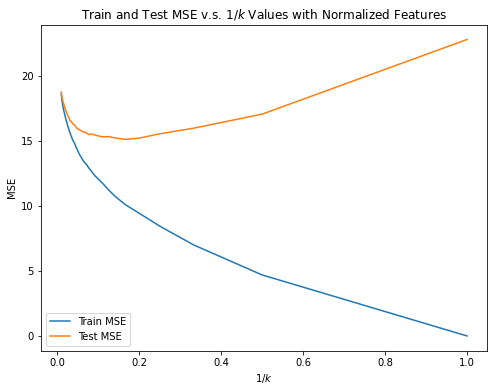

In [30]:
# Plot the train and test errors in terms of 1/k
plt.figure(figsize=(8, 6))
plt.plot(k_inverse, train_mse, label='Train MSE')
plt.plot(k_inverse, test_mse, label='Test MSE')
plt.title('Train and Test MSE v.s. $1/k$ Values with Normalized Features')
plt.xlabel('$1/k$')
plt.ylabel('MSE')
plt.legend(loc="lower left")

plt.show()

In [31]:
# Fit KNN regression with raw features

train_mse = list()
test_mse = list()

# Iterate through k in {1, 2, ..., 100}
for k in k_values:
    # Declare regressor
    neigh = KNeighborsRegressor(n_neighbors=k)
    # Train model
    neigh.fit(X_train, Y_train)
    # Use model to make predictoin
    train_raw_pred = neigh.predict(X_train)
    test_raw_pred = neigh.predict(X_test)
    # Calculate and store train and test MSE
    train_mse.append(mean_squared_error(Y_train, train_raw_pred))
    test_mse.append(mean_squared_error(Y_test, test_raw_pred))

In [32]:
# Find optimal k = k* where we have lowest mse and report the result
print('Minimum train MSE with raw features:', min(train_mse))
print('Optimal k* for training at k =', k_values[np.argmin(train_mse)])
print('Minimum test MSE with raw features:', min(test_mse))
print('Optimal k* for testing at k =', k_values[np.argmin(test_mse)])

# Store test MSE
summarize_test_error['KNN Regression with Raw Features'] = min(test_mse)

Minimum train MSE with raw features: 0.0
Optimal k* for training at k = 1
Minimum test MSE with raw features: 16.961426846046663
Optimal k* for testing at k = 6


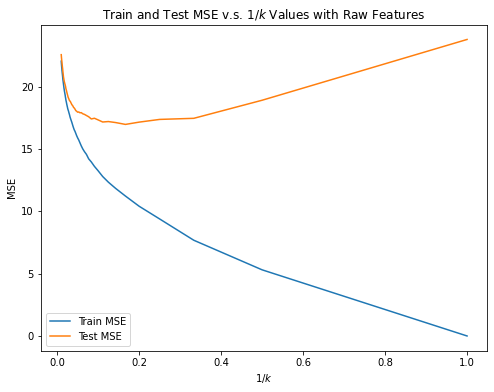

In [33]:
# Plot the train and test errors in terms of 1/k
plt.figure(figsize=(8, 6))
plt.plot(k_inverse, train_mse, label='Train MSE')
plt.plot(k_inverse, test_mse, label='Test MSE')
plt.title('Train and Test MSE v.s. $1/k$ Values with Raw Features')
plt.xlabel('$1/k$')
plt.ylabel('MSE')
plt.legend(loc="lower left")

plt.show()

Comparing the $k$-nearest neighbor regression using normalized and raw features, we see that the model with normalized features obtains smaller MSE in the testing state. Namely, we find that at $k^* = 6$, the $k$-nearest neighbor regression with normalized features gives us the best fit with MSE approximately 15.122.

## (j)

Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [34]:
# Convert dict into table 
table = pd.DataFrame(summarize_test_error.items(), columns= ['Model Name', 'Test Error'])
display(table)

,Model Name,Test Error
0,Linear Regression without interaction,20.471654
1,Linear Regression with interaction,17.737685
2,KNN Regression with Normalized Features,15.122023
3,KNN Regression with Raw Features,16.961427


### Analysis on (j)

From the table above, we see that the KNN regression with raw features gives us the smallest test error among all models. Additioonally, we also recognize that KNN regression models perform better in general when comparing to linear regression models.

This is due to the fact that we see some nonlinear association within variables and interaction between variables are statistically significant. This means that if we are going to use the linear regression model, we would need to conduct more rigorous hypothesis testings on the coefficients to determine the ultimate model from the linear regression approach. 

Thus, the KNN regression approach for this dataset should be an optimal option.

# 2. ISLR: 2.4.1

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

### (a) The sample size $n$ is extremely large, and the number of predictors $p$ is small.

We would expect the performance to be better. Notice that having a large sample size will help us reduce the error causing by the variance, given that those error will not have a large impact on the data set as whole. Additionally, with a small number of predictors, we will be more flexible to manipulate the statistical learning model. We would expect a flexible model to perform better given the condition than a inflexible model.

### (b) The number of predictors $p$ is extremely large, and the number of observations $n$ is small.

We would expect the performance to be worse. As a large number of predictors would make the model not as flexible as one with fewer predictors. Moreover, more predictors means that it would require more cost to compute the model. In addition, if the number of observations $n$ is small, then we should expect that some small variance or change in the observation would have a significant impact on the model. Therefore, we should expect a inflexible model to perform better in this case than a flexible model.

### (c) The relationship between the predictors and response is highly non-linear.

If the relationship between the predictors and response is highly non-linear, then we would need some model with flexibility to capture the non-linear association between those predictors and response. A flexible model can help us reduce bias. Thus, we expect a flexible model to perform bettern than the inflexible model.

### (d) The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high.

If the variance of the error terms is high, we may expect there is a lot of noise in the sample which could affect the model. We want our model to deal with those spreading noise. Thus, a inflexible model should perform better than a flexible model.

# 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, $X_1 = X_2 = X_3 = 0$.

The Euclidean distance for each observations in the table can be computed by the following set of equations. Let's denote the distance as $d_i$ for $i \in [1, 2, \dots, 6]$. Also, we know that our test point is $X_1 = X_2 = X_3 = 0$, which we can simplify our calculation as

$$
\begin{align*}
d_1 &= \sqrt{0^2 + 3^2 + 0^2} = \sqrt{9} = 3 \\
d_2 &= \sqrt{2^2 + 0^2 + 0^2} = \sqrt{4} = 2 \\
d_3 &= \sqrt{0^2 + 1^2 + 3^2} = \sqrt{1 + 9} = \sqrt{10} \\
d_4 &= \sqrt{0^2 + 1^2 + 2^2} = \sqrt{1 + 4} = \sqrt{5} \\
d_5 &= \sqrt{(-1)^2 + 0^2 + 1^2} = \sqrt{1 + 1} = \sqrt{2} \\
d_6 &= \sqrt{1^2 + 1^2 + 1^2} = \sqrt{1 + 1 + 1} = \sqrt{3}
\end{align*}
$$

### (b) What is our prediction with $K = 1$? Why?

When $K = 1$, we look at the closest distance from the test point to make predictions. Given that the test point is $(0, 0, 0)$ and combined with the calculation in part (a). We see that the predicted point will be observation 5 given that $\sqrt{2}$ is the closest distance. Thus, the predicted color is Green.

### (c) What is our prediction with $K = 3$? Why?

With $K = 3$, we look at the 3 closest points from the test point. Observation 5 with distance $\sqrt{2}$, observation 6 with distance $\sqrt{3}$, and observation 4 with distance $\sqrt{5}$ should be examinated. Notice that both observation 4 and 5 are Green, and only observation 6 is red. Thus, we predict the color is Green.

### (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the *best* value for $K$ to be large or small? Why?

If the Bayes decision boundary is highly nonlinear, then we expect the best value of $K$ to be smaller. This is due to the fact the if $K$ is large, then the model will be inflexible and the decision boundary will be more linear. If we have a smaller $K$ value, the model will be more flexible and the decision boundary will be more non-linear, which is what we want in the case.

# Reference

Generating polynomial features： https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features

Linear Regression - Statsmodels: https://www.statsmodels.org/stable/regression.html

`sklearn.preprocessing.MinMaxScaler`: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html